# New section

In [ ]:
import os
cwd = os.getcwd()
print(cwd)

/content


In [ ]:
!ls -lh /content/*
!cat /content/sample_data/README.md

total 55M
-rwxr-xr-x 1 root root 1.7K Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root 295K Jan  7 14:33 california_housing_test.csv
-rw-r--r-- 1 root root 1.7M Jan  7 14:33 california_housing_train.csv
-rw-r--r-- 1 root root  18M Jan  7 14:33 mnist_test.csv
-rw-r--r-- 1 root root  35M Jan  7 14:33 mnist_train_small.csv
-rwxr-xr-x 1 root root  930 Jan  1  2000 README.md
This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Ans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing dependencies
import numpy as np  #python library for scientific computing
import pandas as pd #python library for data analysis and dataframes e.g. to import spreadsheets


In [ ]:
%ls /content/drive/MyDrive/BigDA/6100Shared/_Data/ex1data2.txt
%cat /content/drive/MyDrive/BigDA/6100Shared/_Data/ex1data2.txt | head 
!echo " "
print("\n")
%cat /content/drive/MyDrive/BigDA/6100Shared/_Data/ex1data2.txt | tail -5

# /content/drive/MyDrive/BigDA/6100Shared/_Data/ex1data2.txt

/content/drive/MyDrive/BigDA/6100Shared/_Data/ex1data2.txt
2104,3,399900
1600,3,329900
2400,3,369000
1416,2,232000
3000,4,539900
1985,4,299900
1534,3,314900
1427,3,198999
1380,3,212000
1494,3,242500
 


2567,4,314000
1200,3,299000
852,2,179900
1852,4,299900
1203,3,239500


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BigDA/6100Shared/_Data/ex1data2.txt', header= None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
data = df.copy()
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
data.columns =(['Size','Bedroom','Price'])
data.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
data.drop('Bedroom', axis=1, inplace=True)


In [ ]:
data1 = data.sample(frac=0.5)
data1.head()

,Size,Price
38,4215,549000
3,1416,232000
42,2567,314000
8,1380,212000
1,1600,329900


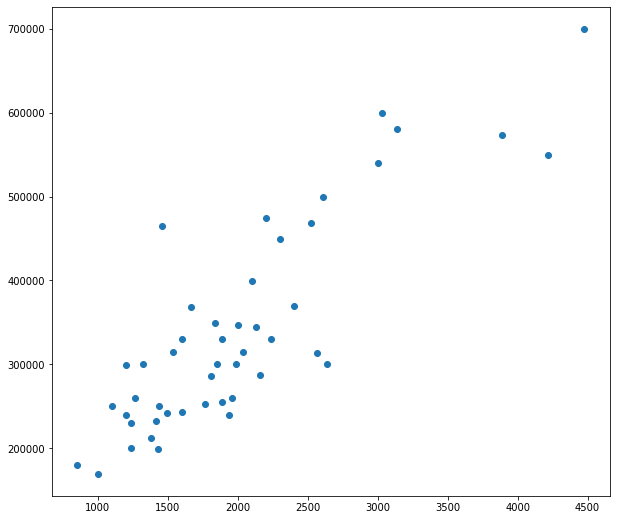

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 9.0)

# Preprocessing Input data

X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()


In [ ]:
m = 0
c = 0

L = 0.0001 # The learning Rate
itr = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(itr): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-1/n) * (sum((X * (Y - Y_pred))/abs(Y - Y_pred)))  # Derivative wrt m
    D_c = (-1/n) * sum((Y - Y_pred)/abs(Y - Y_pred))  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

158.14936595744618 0.08228936170212826


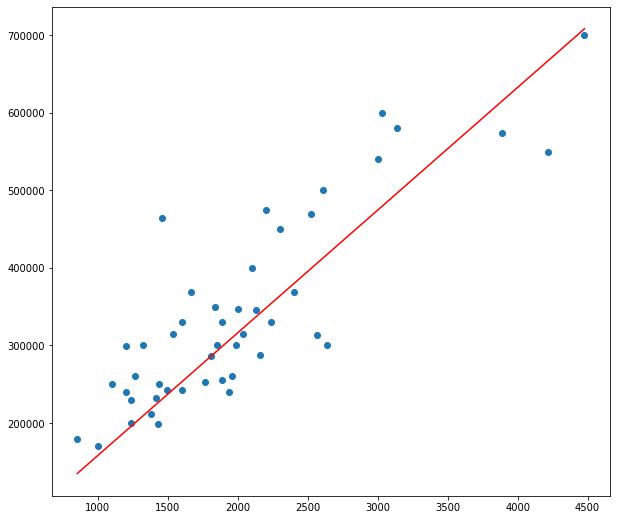

In [ ]:
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

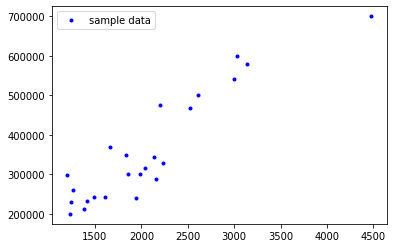

In [ ]:
plt.plot(data1.Size, data1.Price, 'b.', label='sample data')
plt.legend(loc='best')
plt.show()

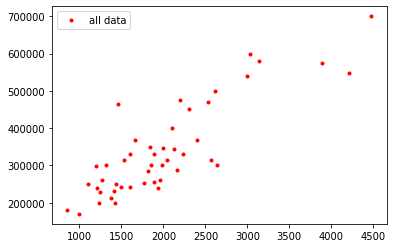

In [ ]:
plt.plot(data.Size, data.Price, 'r.', label="all data")
plt.legend(loc='best')
plt.show()

**Least Square Error Method**

As we know that Ordinary Least Squares regression (OLS) is a technique for estimating coefficients of linear regression equations. It describes the relationship between one or more independent variables and a dependent variable

Least Square error Criterion:
  **Minimum(Sigma(observed_values - estimated_values)^2)**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import matplotlib as mpl
import statsmodels.formula.api as sm #from this we can use OLS model to fit a line to the data
from sklearn.linear_model import LinearRegression
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
s = data['Size'] #Independent_variable
p = data['Price'] #Dependent_variable

In [ ]:
import statsmodels.api as sa
s= sa.add_constant(s) #An intercept is not included by default and should be added by the user, It adds a column of ones to an array.
model = sm.ols(formula="p ~ s", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      p   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     122.3
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           2.03e-14
Time:                        15:04:06   Log-Likelihood:                -586.94
No. Observations:                  47   AIC:                             1178.
Df Residuals:                      45   BIC:                             1182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.564e+04   1.31e+04      2.725      0.0

**Fitting a line to the Given Data**

From the above OLS Regression Results,
**Slope=166.1441, Intercept=7571.2744** 

that is,
the regression line equation is given by,
**p = 66.1441*s + 7571.2744**

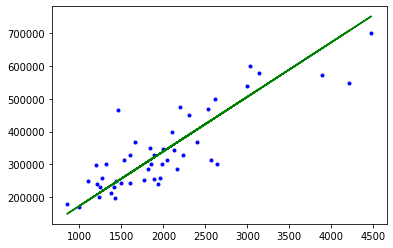

In [ ]:
plt.plot(data.Size, p, 'b.')
slope=166.1441
intercept=7571.2744

line_values = [slope * v + intercept for v in data.Size]
plt.plot(data.Size , line_values, 'g-')
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html ///content/drive/MyDrive/gopichand_tadapaneni (1).ipynb

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `jupyter nbconvert --to html ///content/drive/MyDrive/gopichand_tadapaneni (1).ipynb'


CalledProcessError: ignored